# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [29]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [30]:
df= pd.read_csv('RTA_Dataset.csv') #load dataset

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [31]:
df.info() # to know the info and data types in RTA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [32]:
df.shape # to get the shape

(12316, 32)

In [33]:
#View the the data with various functions to get an initial sense of the data.

# take a look to the features in RTA
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [34]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [35]:
df['Area_accident_occured'].unique() # show the values exist in this column

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Unknown', 'Rural village areas',
       ' Outside rural areas', ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

In [36]:
df['Time'].rank() # count the numerical data ranks of time

0        5317.5
1        5317.5
2        5317.5
3        8126.5
4        8126.5
          ...  
12311    4584.0
12312    6482.0
12313    2708.5
12314    2708.5
12315    2708.5
Name: Time, Length: 12316, dtype: float64

In [37]:
df['Educational_level'].is_unique

False

In [38]:
#Perform summary statistics on the dataset to grasp central tendencies and variability.
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [39]:
df['Number_of_casualties'].astype('int8')

0        2
1        2
2        2
3        2
4        2
        ..
12311    1
12312    1
12313    1
12314    1
12315    1
Name: Number_of_casualties, Length: 12316, dtype: int8

In [40]:
df['Number_of_casualties'].max()

8

In [41]:
df['Day_of_week'].astype('str')

0           Monday
1           Monday
2           Monday
3           Sunday
4           Sunday
           ...    
12311    Wednesday
12312       Sunday
12313       Sunday
12314       Sunday
12315       Sunday
Name: Day_of_week, Length: 12316, dtype: object

In [42]:
df['Accident_severity'].values

array(['Slight Injury', 'Slight Injury', 'Serious Injury', ...,
       'Serious Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

In [43]:
# Check for duplicated data.
df.duplicated().sum()

0

In [44]:
# Check for null values.
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [45]:
#Handle missing values
# 1. Defect_of_vehicle  
df['Defect_of_vehicle'].unique()

array(['No defect', nan, '7', '5'], dtype=object)

In [46]:
# start with this column which have the highest null values
df['Defect_of_vehicle']= df['Defect_of_vehicle'].replace(method='bfill')

C:\Users\rahaf\AppData\Local\Temp\ipykernel_19492\539208896.py:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Defect_of_vehicle']= df['Defect_of_vehicle'].replace(method='bfill')


In [47]:
df['Defect_of_vehicle'].isnull().sum()

0

In [48]:
df['Type_of_collision'].dropna()

0        Collision with roadside-parked vehicles
1                 Vehicle with vehicle collision
2                Collision with roadside objects
3                 Vehicle with vehicle collision
4                 Vehicle with vehicle collision
                          ...                   
12311             Vehicle with vehicle collision
12312             Vehicle with vehicle collision
12313             Vehicle with vehicle collision
12314             Vehicle with vehicle collision
12315             Vehicle with vehicle collision
Name: Type_of_collision, Length: 12161, dtype: object

In [49]:
# i will drop it becuase its the lowest column have null values (its not a good way i know)
df['Type_of_collision'].isnull().sum()

155

In [50]:
df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [51]:
df['Service_year_of_vehicle'].astype('str')

0        Above 10yr
1           5-10yrs
2               nan
3               nan
4           5-10yrs
            ...    
12311           nan
12312           nan
12313        2-5yrs
12314        2-5yrs
12315        2-5yrs
Name: Service_year_of_vehicle, Length: 12316, dtype: object

In [52]:
df['Service_year_of_vehicle'].replace('known')

C:\Users\rahaf\AppData\Local\Temp\ipykernel_19492\3814853644.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['Service_year_of_vehicle'].replace('known')


0        Above 10yr
1           5-10yrs
2               NaN
3               NaN
4           5-10yrs
            ...    
12311           NaN
12312           NaN
12313        2-5yrs
12314        2-5yrs
12315        2-5yrs
Name: Service_year_of_vehicle, Length: 12316, dtype: object

In [53]:
df['Service_year_of_vehicle'].isnull().sum()

3928

In [54]:

df['Time'] = pd.to_datetime(df['Time'].index)



In [57]:
#Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
from sklearn.preprocessing import minmax_scale

scaled_data = minmax_scale(X=df['Number_of_casualties'], feature_range=(0, 1), axis=0, copy=True)
scaled_data

array([0.14285714, 0.14285714, 0.14285714, ..., 0.        , 0.        ,
       0.        ])

In [63]:
# Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
from sklearn.preprocessing import StandardScaler

std= StandardScaler()
std.fit_transform(df['Number_of_casualties'].values.reshape(-1,1))


array([[ 0.44864885],
       [ 0.44864885],
       [ 0.44864885],
       ...,
       [-0.54426386],
       [-0.54426386],
       [-0.54426386]])

In [ ]:
# label encoding Convert categorical text data into model-understandable numbers where the labels are ordered.
from sklearn.preprocessing import LabelEncoder
labelEnc= LabelEncoder()
df['Educational_level']= labelEnc.fit_transform(df['Educational_level'])
df['Educational_level']

Time
2024-08-01 17:02:00    0
2024-08-01 17:02:00    4
2024-08-01 17:02:00    4
2024-08-01 01:06:00    4
2024-08-01 01:06:00    4
                      ..
2024-08-01 16:15:00    7
2024-08-01 18:00:00    1
2024-08-01 13:55:00    4
2024-08-01 13:55:00    4
2024-08-01 13:55:00    4
Name: Educational_level, Length: 12316, dtype: int64

In [84]:
#One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship
# exists to transform the data into a binary column for each category.
# (Be careful not to increase the dimensionality significantly)
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(handle_unknown='ignore')




In [65]:
df= df.drop_duplicates()

<Axes: >

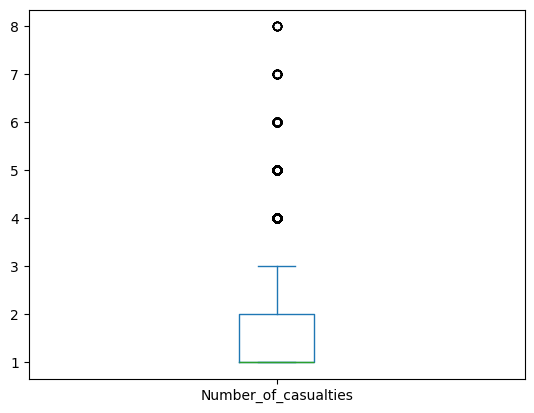

In [66]:
#Detection and Treatment of Outliers  Use statistical tests, box plots, or scatter plots to identify outliers 

import seaborn as sns
df['Number_of_casualties'].plot(kind='box')



<Axes: xlabel='Number_of_casualties', ylabel='Number_of_casualties'>

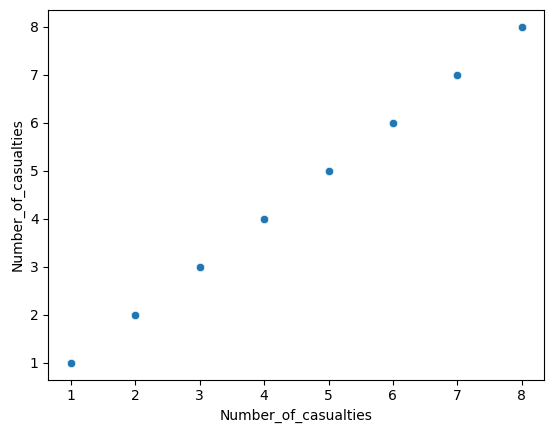

In [67]:
sns.scatterplot(x='Number_of_casualties', y='Number_of_casualties', data= df)

<Axes: xlabel='Number_of_casualties'>

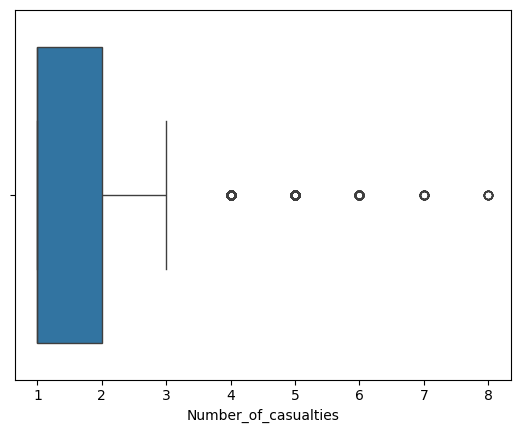

In [68]:
sns.boxplot(x='Number_of_casualties', data= df)

In [70]:
# and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
cap_outliers= df['Number_of_casualties'].quantile(0.95)
cap_outliers

4.0

In [72]:
trm_data= df['Number_of_casualties'].clip(upper= cap_outliers)
trm_data

0        2
1        2
2        2
3        2
4        2
        ..
12311    1
12312    1
12313    1
12314    1
12315    1
Name: Number_of_casualties, Length: 12316, dtype: int64

In [75]:
#Feature Engineering: Enhance your dataset by creating new features and transforming existing ones.

df['Road_Status']= df['Road_surface_type'] + df['Road_allignment'] 
df['Road_Status']


0              Asphalt roadsTangent road with flat terrain
1              Asphalt roadsTangent road with flat terrain
2                                                      NaN
3        Earth roadsTangent road with mild grade and fl...
4              Asphalt roadsTangent road with flat terrain
                               ...                        
12311          Asphalt roadsTangent road with flat terrain
12312                             Asphalt roadsEscarpments
12313    Asphalt roadsTangent road with mountainous ter...
12314    Asphalt roadsTangent road with mountainous ter...
12315    Asphalt roadsTangent road with mountainous ter...
Name: Road_Status, Length: 12316, dtype: object

In [81]:
df['Type_of_vehicle'].transform(lambda x: x.upper())
df['Type_of_vehicle']

0                 AUTOMOBILE
1        PUBLIC (> 45 SEATS)
2            LORRY (41?100Q)
3        PUBLIC (> 45 SEATS)
4                           
                ...         
12311         LORRY (11?40Q)
12312             AUTOMOBILE
12313                  BAJAJ
12314        LORRY (41?100Q)
12315                  OTHER
Name: Type_of_vehicle, Length: 12316, dtype: object

In [ ]:
# or reducing dimensionality with techniques like PCA to improve model performance.


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: xlabel='Number_of_casualties'>

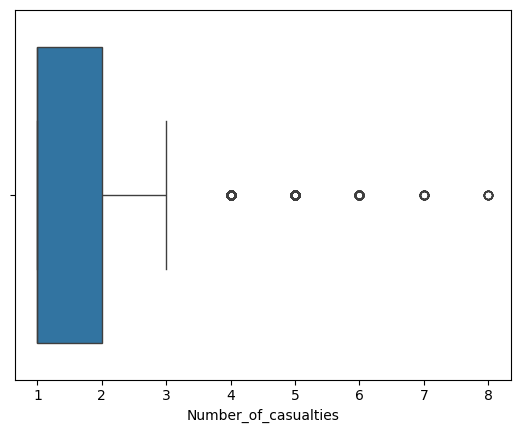

In [96]:
sns.boxplot(x='Number_of_casualties',data= df)

<Axes: xlabel='Number_of_casualties', ylabel='Count'>

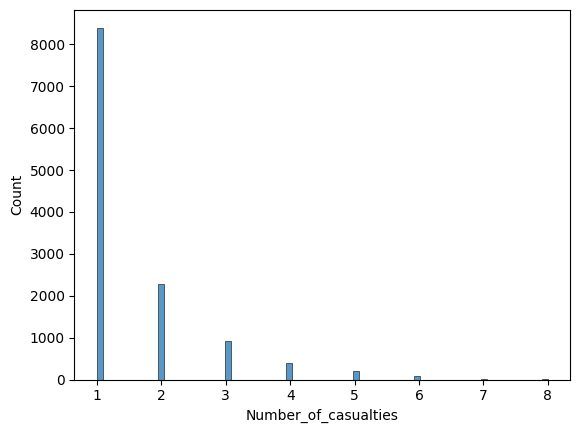

In [97]:
sns.histplot(x='Number_of_casualties', data= df)

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

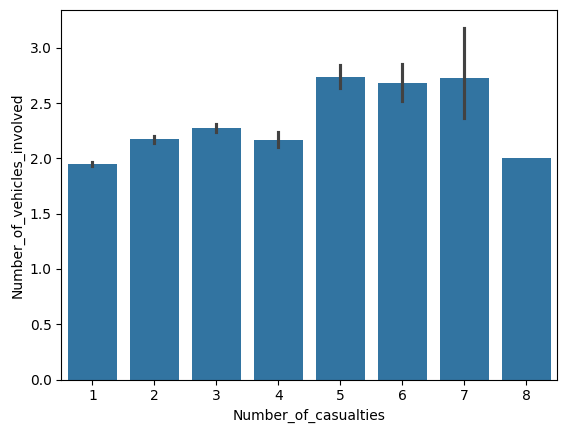

In [99]:
sns.barplot(x='Number_of_casualties', y='Number_of_vehicles_involved', data= df)

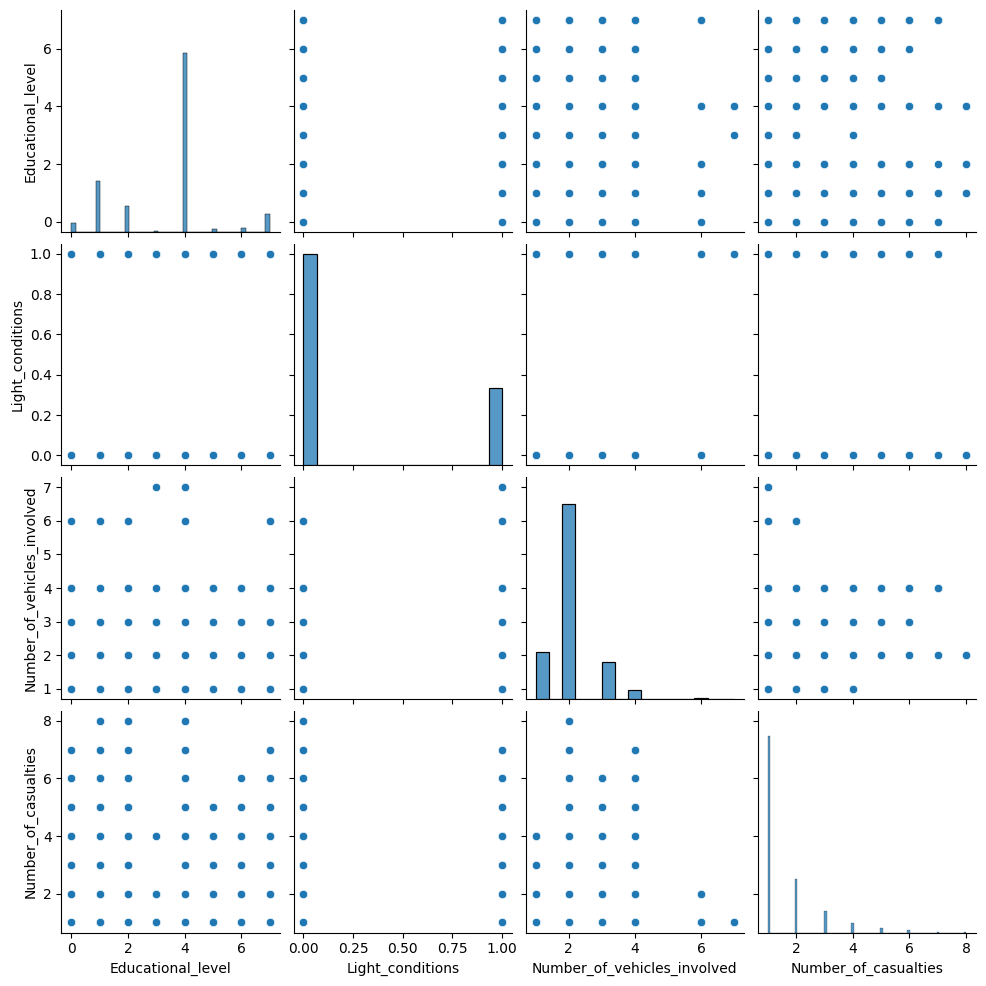

In [ ]:
sns.pairplot(df)

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [85]:
from sklearn.model_selection import train_test_split

In [124]:
seed=42
#np.random.seed(seed)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x= df[['Number_of_vehicles_involved','Number_of_casualties']]
y= df['Accident_severity']
#x_train ,x_test, y_train, y_test = train_test_split(df, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

#### Support Vector Machine (SVM)

In [130]:
#Support vector machine
from sklearn.svm import SVC

suvm= SVC()

suvm.fit(x_train, y_train)
suvm.score(x_test, y_test)

0.8370771312584574

#### K-Neighbors Classifier

In [134]:
# knn
from sklearn.neighbors import KNeighborsClassifier

kn= KNeighborsClassifier()

kn.fit(x_train, y_train)


KNeighborsClassifier()

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [137]:
# model evaluation will apply on y_predict

# confusion matrix
from sklearn.metrics import confusion_matrix

consm= confusion_matrix(y_test, kn.predict(x_test))
consm

array([[   0,   13,   39],
       [   0,  135,  417],
       [   0,  390, 2701]], dtype=int64)

In [141]:
from sklearn.metrics import accuracy_score
y_pred= kn.predict(x_test)
acc= accuracy_score(y_pred, y_test)
acc

0.7675236806495264

In [150]:
# precision, recall, f1-score
# different ways of average
from sklearn.metrics import precision_score, recall_score, f1_score

prec= precision_score(y_test, y_pred, average='micro')
prec



0.7675236806495264

In [146]:
rec = recall_score(y_test, suvm.predict(x_test), average='weighted')
rec

0.8370771312584574

In [152]:
f1= f1_score(y_test,suvm.predict(x_test), average='macro')

f1

0.31083644598688276

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1. compare Metrics: Accuracy is applied on the whole model, precision is used when we focus on the positive predicions, Recall consider the FN from confuison matrics.

2. Evaluat: Accuracy is important when the model containes sensitive daat


3. Features data types must convert to approporate data types in future


6. Dataset must reshape to be more recognize



